In [51]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
Image.MAX_IMAGE_PIXELS = None
#from openslide import OpenSlide
from matplotlib import pyplot as plt
from glob import glob
import openslide

In [50]:
from ctypes.util import *
from ctypes import *
find_library("libopenslide-0.dll")
lib = cdll.LoadLibrary(find_library("libopenslide-0.dll"))

In [44]:

# read annotation
pkl_path = r'\\fatherserverdw\kyuex\great'
pkls = glob(os.path.join(pkl_path,'*pkl'))

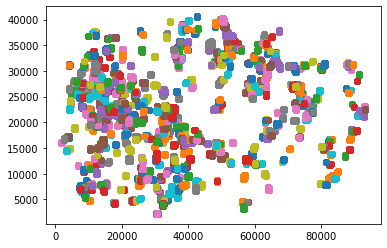

In [78]:
for pkl in pkls:
    csvobj = pd.read_pickle(pkl)
    # read image size
    impth = pkl.replace('pkl','ndpi')
    #imageobj = OpenSlide(impth)
    imageobj = openslide.OpenSlide(impth)
    image_size = imageobj.dimensions
    (width,height) = image_size
    img = Image.new('L', (round(width), round(height)), 0) #0 for default pixel value

    iter_order = [2,10,5,4,6,11,7,9,8,12,3,1]
    for i in iter_order:
        for idx, row in csvobj.iterrows():
            if(int(row['Class ID']) == i):
                color = i
                xycoord = np.squeeze((row['Coord'].astype('float64')).astype('uint32'))
                plt.scatter(xycoord[:,0],xycoord[:,1]) #(x,y) this is right because (0,0) is the bottom left of the plot
                xycoord = list(zip(xycoord[:,0],xycoord[:,1])) #turn [[,]] into tuples (x,y)
                #this fill value should be class id
                ImageDraw.Draw(img).polygon(xycoord, outline=None, fill=color)

    dstfn = pkl.replace('pkl','png')
    img.save(dstfn)
